# Premier League 2017-2018 EDA

An exploratory data analysis on the 2017-2018 English Premier League season.

### Context:

The Premier League is the top tier of England's football pyramid. There are 20 teams within the Premier League that compete against each throughout the football season to be crowned as champion. The Premier League is widely regarded as the most competitive football league in the world.

In the 2017-2018 Premier League season, Manchester City Football Club were crowned English champions as they had a record breaking season; accumulating over 100 points. This is a feat accomplished by some of the best clubs across Europe such as Real Madrid in 2011-2012, Barcelona in 2012-2013, and Juventus in 2013-2014 to name a few.

We will be analyzing data from the 2017-2018 Premier League season to further understand how a massive achievement was secured.

In [3]:
#Importing libraries

import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import math

In [4]:
#Importing Premier League Match dataset

matches = pd.read_csv("2017_18 matches.csv")

In [3]:
#Importing Premier League Player dataset

players = pd.read_csv("pl_17-18.csv")

### Quick description on matches dataframe

In [4]:
matches.head()

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0


In [5]:
matches.tail(10)

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
370,E0,2018-05-13,Burnley,Bournemouth,1,2,A,1,0,H,...,4,5,14,9,7,8,0,0,0,0
371,E0,2018-05-13,Crystal Palace,West Brom,2,0,H,0,0,D,...,5,1,10,11,4,2,2,3,0,0
372,E0,2018-05-13,Huddersfield,Arsenal,0,1,A,0,1,A,...,3,4,11,7,7,4,1,0,0,0
373,E0,2018-05-13,Liverpool,Brighton,4,0,H,2,0,H,...,11,1,3,6,7,3,0,0,0,0
374,E0,2018-05-13,Man United,Watford,1,0,H,1,0,H,...,1,3,6,11,6,5,4,0,0,0
375,E0,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,...,6,2,11,10,4,2,0,1,0,0
376,E0,2018-05-13,Southampton,Man City,0,1,A,0,0,D,...,3,2,8,10,1,12,3,1,0,0
377,E0,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,...,11,5,12,9,6,0,1,2,0,0
378,E0,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,...,6,9,9,13,4,4,1,2,0,0
379,E0,2018-05-13,West Ham,Everton,3,1,H,1,0,H,...,4,7,10,13,6,6,0,1,0,0


In [5]:
matches.shape

(380, 23)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   div       380 non-null    object
 1   date      380 non-null    object
 2   hometeam  380 non-null    object
 3   awayteam  380 non-null    object
 4   fthg      380 non-null    int64 
 5   ftag      380 non-null    int64 
 6   ftr       380 non-null    object
 7   hthg      380 non-null    int64 
 8   htag      380 non-null    int64 
 9   htr       380 non-null    object
 10  referee   380 non-null    object
 11  hs        380 non-null    int64 
 12  as        380 non-null    int64 
 13  hst       380 non-null    int64 
 14  ast       380 non-null    int64 
 15  hf        380 non-null    int64 
 16  af        380 non-null    int64 
 17  hc        380 non-null    int64 
 18  ac        380 non-null    int64 
 19  hy        380 non-null    int64 
 20  ay        380 non-null    int64 
 21  hr        380 no

In [7]:
matches.describe()

,fthg,ftag,hthg,htag,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.589474,10.857895,4.628947,3.765789,10.218421,10.484211,5.744737,4.547368,1.478947,1.565789,0.044737,0.057895
std,1.340087,1.177793,0.793403,0.756511,5.773645,4.856333,2.710617,2.314435,3.256360,3.334043,2.998786,2.765290,1.256993,1.259639,0.219375,0.233852
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,18.000000,13.000000,6.000000,7.000000,2.000000,1.000000


In [44]:
#Total Goals

total_goals = np.trunc(matches["ftag"].sum() + matches["fthg"].sum())
print("Total Goals Scored in 2017/18: " + str(total_goals))

Total Goals Scored in 2017/18: 1018.0


In [45]:
#Total yellow cards
total_yellow = np.trunc(matches["hy"].sum() + matches["ay"].sum())
print("Total Yellow Cards issued: " + str(total_yellow))


Total Yellow Cards issued: 1157.0


In [46]:
#Total red cards
total_red = np.trunc(matches["hr"].sum() + matches["ar"].sum())
print("Total Red Cards issued: " + str(total_red))


Total Red Cards issued: 39.0


In [8]:
#Creating a league table dataframe

teams = np.sort(matches["hometeam"].unique())
teams

array(['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Huddersfield', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Southampton',
       'Stoke', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham'], dtype=object)

In [34]:
players

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Shooting accuracy %,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,0,Rolando Aarons,Midfielder,4,NaN,NaN,4.0,100%,NaN,0.0,...,50%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Abdul Rahman Baba,Defender,0,0.0,0.0,0.0,0%,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tammy Abraham,Forward,31,NaN,NaN,10.0,NaN,NaN,11.0,...,36%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Charlie Adam,Midfielder,11,NaN,NaN,9.0,56%,NaN,3.0,...,30%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Adrián,Goalkeeper,19,6.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,69.0,0.0,6.0,9.0,2.0,15.0,47.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,788,Marvin Zeegelaar,Defender,12,2.0,17.0,23.0,78%,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,789,Zhang Yuning,Forward,0,NaN,NaN,0.0,NaN,NaN,0.0,...,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,790,Ron-Robert Zieler,Goalkeeper,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,791,Oleksandr Zinchenko,Defender,8,NaN,NaN,23.0,70%,NaN,0.0,...,40%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Replacing null values with zero

players.fillna(0, inplace=True)

In [36]:
players

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Shooting accuracy %,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,0,Rolando Aarons,Midfielder,4,0.0,0.0,4.0,100%,0.0,0.0,...,50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Abdul Rahman Baba,Defender,0,0.0,0.0,0.0,0%,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Tammy Abraham,Forward,31,0.0,0.0,10.0,0,0.0,11.0,...,36%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Charlie Adam,Midfielder,11,0.0,0.0,9.0,56%,0.0,3.0,...,30%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Adrián,Goalkeeper,19,6.0,29.0,0.0,0,0.0,0.0,...,0,0.0,69.0,0.0,6.0,9.0,2.0,15.0,47.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,788,Marvin Zeegelaar,Defender,12,2.0,17.0,23.0,78%,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,789,Zhang Yuning,Forward,0,0.0,0.0,0.0,0,0.0,0.0,...,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
790,790,Ron-Robert Zieler,Goalkeeper,0,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,791,Oleksandr Zinchenko,Defender,8,0.0,0.0,23.0,70%,0.0,0.0,...,40%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              793 non-null    int64  
 1   Name                    793 non-null    object 
 2   Position                793 non-null    object 
 3   Appearances             793 non-null    int64  
 4   Clean sheets            793 non-null    float64
 5   Goals conceded          793 non-null    float64
 6   Tackles                 793 non-null    float64
 7   Tackle success %        793 non-null    object 
 8   Last man tackles        793 non-null    float64
 9   Blocked shots           793 non-null    float64
 10  Interceptions           793 non-null    float64
 11  Clearances              793 non-null    float64
 12  Headed Clearance        793 non-null    float64
 13  Clearances off line     793 non-null    float64
 14  Recoveries              793 non-null    fl

In [38]:
players.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Appearances', 'Clean sheets',
       'Goals conceded', 'Tackles', 'Tackle success %', 'Last man tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Goals',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Hit woodwork', 'Goals per match', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %',
       'Big chances missed', 'Saves', 'Penalties saved', 'Punches',
       'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks'],
 

## Premier League Player Analysis

### Top Goal Scorers

<Figure size 1000x1000 with 0 Axes>

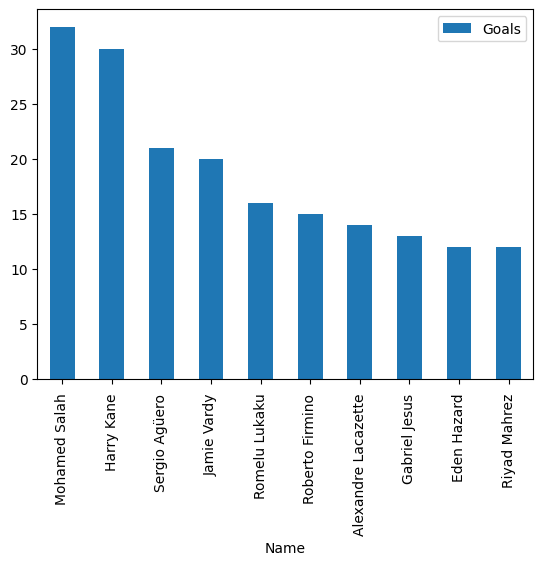

In [39]:
df = players.loc[players["Appearances"] > 0]
top_goals= df.nlargest(10, ["Goals"])
plt.figure(figsize=(10, 10))
top_goals.plot.bar(x="Name", y="Goals")
plt.show()

We observe that from the top 10 goal scorers, Manchester City players occupy three slots - namely Sergio Aguero, Gabriel Jesus and Riyad Mahrez.

### Top Assisters

<Figure size 1000x1000 with 0 Axes>

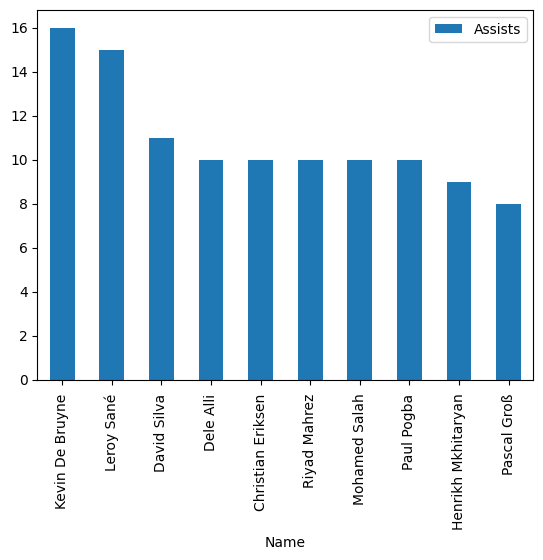

In [40]:
top_assists = df.nlargest(10, ["Assists"])
plt.figure(figsize=(10, 10))
top_assists.plot.bar(x="Name", y="Assists")
plt.show()

When looking at the top 10 players with the most assists, we see that Manchester City players occupy 4 out of the 10 slots - namely Kevin De Bruyne, Leroy Sane, David Silva and Riyad Mahrez

### Defensive Stats

It has been stated many a times that the best offense is a great defense. We will take a look at City's defensive record.

In [58]:
clean_sheets = matches.loc[((matches["hometeam"] == "Man City") & (matches["ftag"] == 0)) | ((matches["awayteam"] == "Man City") & (matches["fthg"] == 0))]
clean_sheets = clean_sheets.shape[0]
clean_sheets

18

In [59]:
non_clean_sheets = matches.loc[((matches["hometeam"] == "Man City") & (matches["ftag"] != 0)) | ((matches["awayteam"] == "Man City") & (matches["fthg"] != 0))]
non_clean_sheets = non_clean_sheets.shape[0]
non_clean_sheets

20

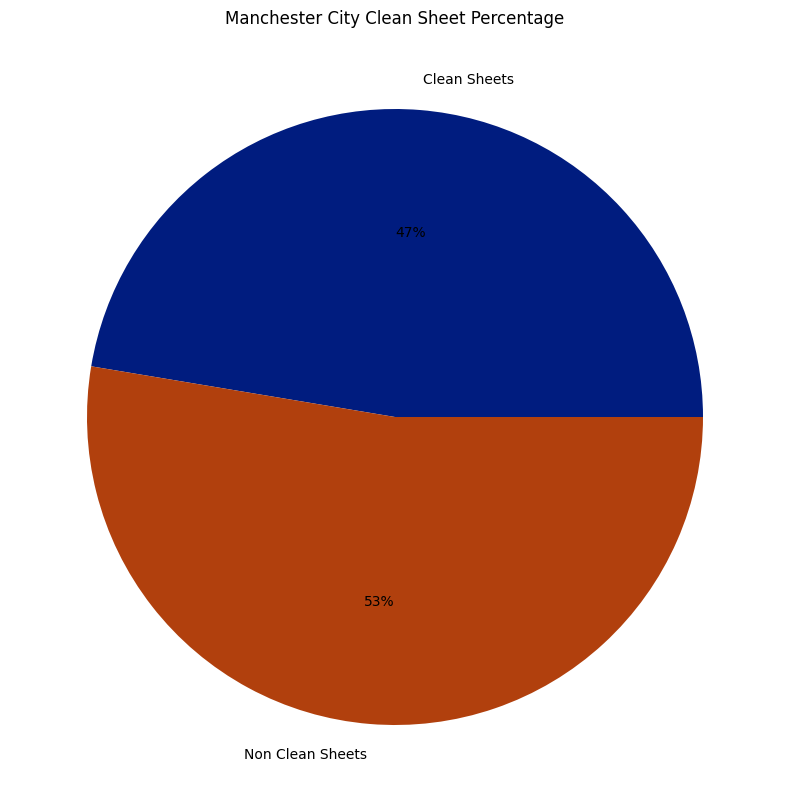

In [62]:
plt.figure(figsize=(10, 10))
data = [clean_sheets, non_clean_sheets]
labels = ["Clean Sheets", "Non Clean Sheets"]
color = sns.color_palette("dark")
plt.title("Manchester City Clean Sheet Percentage", fontsize=12, color="black")
plt.pie(data, colors=color, labels=labels, autopct="%.0f%%")
plt.show()

In [ ]:
clean_sheet_lst = [0]*len(teams)

for i in range(len(teams)):
    for j in range(matches.shape[0]):
        if matches["hometeam"].values[j] == teams[i] and matches["ftag"].values[j] == 0:
            clean_sheet_lst[i] += 1
        elif matches["awayteam"].values[j] == teams[i] and matches["fthg"].values[j] == 0:
            clean_sheet_lst[i] += 1
        else:
            clean_sheet_lst[i] += 0



In [1]:
#Find new way to group clean sheets per team


NameError: name 'matches' is not defined